- fixed-size dense vector representation (embedding) given texts or images
- super fast
- semantic textual similarity, semantic search, clustering, classification, paraphrase mining, and more


Difference
- SentenceTransformer (bi-encoder) produces a sentence embedding vector for each input sentence. These embeddings can be efficiently compared using cosine similarity. Well-suited for tasks like semantic search, where you need to compare a query against a large corpus of sentences.
- CrossEncoder does not produce sentence embeddings. It only outputs a score indicating the relationship between the input sentence pair. Tasks where subtle differences matter, like comparing a small number of sentences in legal or medical domains.


Training of models
- Bi-encoders are trained to maximize the similarity between a query and relevant sentences, while minimizing similarity to irrelevant sentences.
- Cross-encoders are trained as a classification task, predicting a score or label for the relationship between the input sentence pair

(Perplexity)

Text sources
- https://visitmadeira.com/en/what-to-do/nature-seekers/activities/hiking/pr-7-levada-do-moinho/
- https://visitmadeira.com/en/what-to-do/nature-seekers/activities/hiking/pr-91-levada-do-caldeirao-verde-um-caminho-para-todos/
- https://visitmadeira.com/en/what-to-do/nature-seekers/activities/hiking/pr-13-vereda-do-fanal/


In [ ]:
!pip install sentence-transformers matplotlib seaborn

In [41]:
import re

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
def split(text: str) -> list[str]:
    sentences = re.split(r'[.!?]+', text.strip())
    sentences = [s.strip() for s in sentences]
    return [s for s in sentences if s]

text = """
This is sentence 1. This is sentence 2! This is sentence 3?
This is sentence 4...
"""
split(text)

['This is sentence 1',
 'This is sentence 2',
 'This is sentence 3',
 'This is sentence 4']

# SentenceTransformer

SentenceTransformer.encode

SentenceTransformer.similarity

In [82]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

/Users/az/.pyenv/versions/3.10.14/envs/exp/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [84]:
model.similarity(model.encode("A man is eating pasta."), model.encode("A man is eating food."))

tensor([[0.7035]])

In [83]:
model.similarity(model.encode("A man is eating pasta."), model.encode("A man is riding a horse."))

tensor([[0.1889]])

In [45]:
text1 = """
This 10,5 km trail, which takes about 3:30 hours, begins at regional road ER 101, which separates the municipalities of Porto Moniz and Calheta, near Ribeira da Cruz. Taking PR 7 Levada do Moinho will allow you to get directly in touch with the island's natural and historical wealth.
Levada do Moinho (also called Levada Grande) owes its name to the fact that along its trail there were several water mills supplied by it.
It is still possible to find the ruins of some of them, like the Achadas mill, the Cancelas mill and the Levada Grande mill.
As their construction was financed by some local people, the right to use the water, a precious resource in Madeira, was exclusive to those people.
"""
text2 = """
Beginning at the Paúl da Serra (Assobiadores) plateau, on regional road ER 209, Vereda do Fanal is 10.8 km long and has an estimated duration of 4 hours, offering hikers the opportunity to cross a wide green area of the indigenous Laurissilva forest.
Here, this forest area endemic of Madeira, a Unesco Natural World Heritage Site, is in a perfect state of conservation and development.
This is a scenery of great natural exuberance, which accompanies and marks the whole experience of hiking along Vereda do Fanal.
Along the trail, in the area known as 'sítio do Fio', you will have the chance to observe the ingenious installation of cables that was made to transport wood and shrubs from the area of Fanal to Chão da Ribeira and Seixal, to help in farming.
"""
texts: list[str] = [text1, text2]
sentences: list[list[str]] = [split(text) for text in texts]
embeddings: list[np.ndarray] = [model.encode(s) for s in sentences]
[len(s) for s in sentences], [e.shape for e in embeddings]

([5, 5], [(5, 384), (5, 384)])

In [46]:
similarity = model.similarity(embeddings[0], embeddings[1])
similarity
# tensor([[ 0.4109,  0.4835,  0.3490,  0.2628,  0.3995],
#         [ 0.2950,  0.1819,  0.1609,  0.1841,  0.3450],
#         [ 0.1483,  0.1426, -0.0041,  0.1085,  0.2878],
#         [ 0.1952,  0.1634,  0.1084,  0.1128,  0.2103],
#         [ 0.0771,  0.1570,  0.3397,  0.1222,  0.2089]])

tensor([[ 0.4109,  0.4835,  0.3490,  0.2628,  0.3995],
        [ 0.2950,  0.1819,  0.1609,  0.1841,  0.3450],
        [ 0.1483,  0.1426, -0.0041,  0.1085,  0.2878],
        [ 0.1952,  0.1634,  0.1084,  0.1128,  0.2103],
        [ 0.0771,  0.1570,  0.3397,  0.1222,  0.2089]])

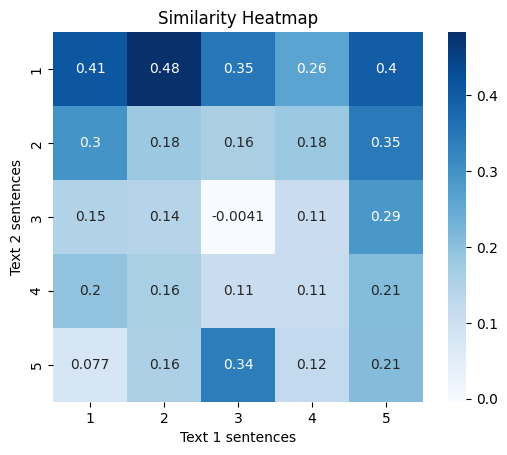

In [53]:
# Similarity Heatmap
sns.heatmap(similarity, annot=True, fmt='.2g', cmap='Blues', cbar=True, square=True,
            xticklabels=range(1, len(embeddings[0]) + 1),
            yticklabels=range(1, len(embeddings[1]) + 1)
            )

plt.title('Similarity Heatmap')
plt.xlabel('Text 1 sentences')
plt.ylabel('Text 2 sentences')

plt.show()

# CrossEncoder
CrossEncoder

CrossEncoder.rank

CrossEncoder.predict

In [85]:
from sentence_transformers.cross_encoder import CrossEncoder

# 1. Load a pretrained CrossEncoder model
model = CrossEncoder("cross-encoder/stsb-distilroberta-base")

/Users/az/.pyenv/versions/3.10.14/envs/exp/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [87]:
model.predict(["A man is eating pasta.", "A man is eating food."])

0.6732372

In [86]:
model.predict(["A man is eating pasta.", "A man is riding a horse."])

0.07569346

In [52]:
# We want to compute the similarity between the query sentence...
query = "A man is eating pasta."

# ... and all sentences in the corpus
corpus = [
    "A man is eating food.",
    "A man is eating a piece of bread.",
    "The girl is carrying a baby.",
    "A man is riding a horse.",
    "A woman is playing violin.",
    "Two men pushed carts through the woods.",
    "A man is riding a white horse on an enclosed ground.",
    "A monkey is playing drums.",
    "A cheetah is running behind its prey.",
]

# 2. We rank all sentences in the corpus for the query
ranks = model.rank(query, corpus)

# Print the scores
print("Query: ", query)
for rank in ranks:
    print(f"{rank['score']:.2f}\t{corpus[rank['corpus_id']]}")
"""
Query:  A man is eating pasta.
0.67    A man is eating food.
0.34    A man is eating a piece of bread.
0.08    A man is riding a horse.
0.07    A man is riding a white horse on an enclosed ground.
0.01    The girl is carrying a baby.
0.01    Two men pushed carts through the woods.
0.01    A monkey is playing drums.
0.01    A woman is playing violin.
0.01    A cheetah is running behind its prey.
"""

Query:  A man is eating pasta.
0.67	A man is eating food.
0.34	A man is eating a piece of bread.
0.08	A man is riding a horse.
0.07	A man is riding a white horse on an enclosed ground.
0.01	The girl is carrying a baby.
0.01	Two men pushed carts through the woods.
0.01	A monkey is playing drums.
0.01	A woman is playing violin.
0.01	A cheetah is running behind its prey.


'\nQuery:  A man is eating pasta.\n0.67    A man is eating food.\n0.34    A man is eating a piece of bread.\n0.08    A man is riding a horse.\n0.07    A man is riding a white horse on an enclosed ground.\n0.01    The girl is carrying a baby.\n0.01    Two men pushed carts through the woods.\n0.01    A monkey is playing drums.\n0.01    A woman is playing violin.\n0.01    A cheetah is running behind its prey.\n'

In [60]:
ranks = [model.rank(s, sentences[1]) for s in sentences[0]]

In [80]:
# ranks
# [[{'corpus_id': 0, 'score': 0.40744218},
#   {'corpus_id': 4, 'score': 0.3278436},
#   {'corpus_id': 3, 'score': 0.1247128},
#   {'corpus_id': 1, 'score': 0.11863633},
#   {'corpus_id': 2, 'score': 0.078810826}],
#  [{'corpus_id': 1, 'score': 0.23656942},
#   {'corpus_id': 4, 'score': 0.23017095},
#   {'corpus_id': 3, 'score': 0.15334602},
#   ...

from operator import itemgetter
ranks_matrix = [[r["score"] for r in sorted(rank, key=itemgetter("corpus_id"))] for rank in ranks]

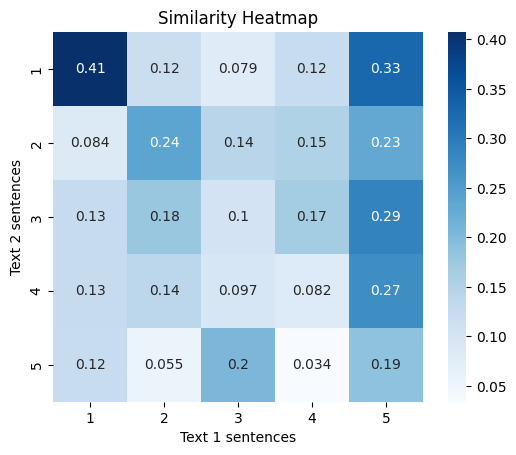

In [81]:
# Similarity Heatmap
sns.heatmap(ranks_matrix, annot=True, fmt='.2g', cmap='Blues', cbar=True, square=True,
            xticklabels=range(1, len(sentences[0]) + 1),
            yticklabels=range(1, len(sentences[1]) + 1)
            )

plt.title('Similarity Heatmap')
plt.xlabel('Text 1 sentences')
plt.ylabel('Text 2 sentences')

plt.show()